In [1]:
using DataFrames, PythonPlot, Distributions
PythonPlot.svg(true)
include("simulations.jl")
FIG_PATH= "/Users/elevien/Dartmouth College Dropbox/Ethan Levien/RESEARCH/ACTIVE/pop_growth_size/figures"


"/Users/elevien/Dartmouth College Dropbox/Ethan Levien/RESEARCH/ACTIVE/pop_growth_size/figures"

# Setup models

In [2]:
function generator(mother_x,theta)
    # simple OU model
    # time, expr., growth_rate, size
    τ,D,s,dt = theta
    X = [[mother_x[1]+dt,mother_x[2],mother_x[3]/2]] # time, expr,size
    while X[end][3]< X[1][3] +1 
        X_new = zeros(3)
        time,gr,l = copy(X[end][:])
        X_new[1] = time+dt
        X_new[2] = gr + 1/τ*(1-gr)*dt +  sqrt(2*D*dt)*randn() 
        X_new[3] = l + gr*l*dt
        push!(X,X_new)
    end
    return Matrix(hcat(X...)')
end




generator (generic function with 1 method)

# Fig 2A

In [3]:
theta = 2,0.05,0.2,0.05 # τ,D,s,dt
init = [0,1.,1]

num_cells = 25
num_lins = 1



data= make_lineages(generator,init,theta,num_cells,num_lins);
df = DataFrame(data,["time","x","length","cell", "lineage"]);
df = df[df.cell .> 10,:];
df.time = df.time .- df.time[1];
df.cell = df.cell .- minimum(df.cell);
df[:,:T] = cumsum(df.x)*mean(diff(df.time));

sys:1: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


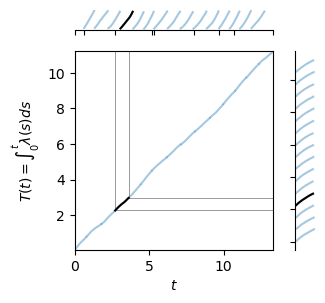

In [4]:
fig = figure(figsize=(3, 3))
gs = fig.add_gridspec(2, 2,  width_ratios=(10, 1), height_ratios=(1, 10),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.2, hspace=0.2)
                    
ax = fig.add_subplot(gs[1, 0])
ax_x = fig.add_subplot(gs[0, 0])
ax_y = fig.add_subplot(gs[1, 1])
ax_x_tw = ax_x.twiny()



# -------------------------------------------------------
ax_x.tick_params(axis="both", left=false, top=false, right=false, bottom=true, labelleft=false, labeltop=false, labelright=false, labelbottom=false,labelsize=8)     
ax_y.tick_params(axis="both", left=true, top=false, right=false, bottom=false, labelleft=false, labeltop=false, labelright=false, labelbottom=false,labelsize=8)
ax_x.spines["right"].set_visible(false)
ax_x.spines["top"].set_visible(false)
ax_x.spines["left"].set_visible(false)
ax_y.spines["right"].set_visible(false)
ax_y.spines["top"].set_visible(false)
ax_y.spines["bottom"].set_visible(false)
ax_x_tw.tick_params(axis="both", left=false, top=false, right=false, bottom=true, labelleft=false, labeltop=false, labelright=false, labelbottom=false,labelsize=8)     
ax_x_tw.spines["right"].set_visible(false)
ax_x_tw.spines["top"].set_visible(false)
ax_x_tw.spines["left"].set_visible(false)
ax_x_tw.spines["bottom"].set_visible(false)


for i in 0:num_cells
    ax.plot(df[df.cell .== i,:].time,df[df.cell .== i,:].T,"C0-",alpha=0.4)
    #ax_x_tw.plot(df[df.cell .== i,:].time,df[df.cell .== i,:].x,"C1-",alpha=0.4)
    ax_x.plot(df[df.cell .== i,:].time,df[df.cell .== i,:].length,"C0-",alpha=0.4)
    ax_y.plot(df[df.cell .== i,:].length,df[df.cell .== i,:].T,"C0-",alpha=0.4)
end

i = 3
ax.plot(df[df.cell .== i,:].time,df[df.cell .== i,:].T,"k-")
ax_x.plot(df[df.cell .== i,:].time,df[df.cell .== i,:].length,"k-")
ax_y.plot(df[df.cell .== i,:].length,df[df.cell .== i,:].T,"k-")


ax.plot([df[df.cell .== i,:].time[1],df[df.cell .== i,:].time[1]]
    ,[df[df.cell .== i,:].T[1],max(df.T[end])],"k-",alpha=0.4,lw=0.7)
ax.plot([df[df.cell .== i,:].time[end],df[df.cell .== i,:].time[end]]
    ,[df[df.cell .== i,:].T[end],max(df.T[end])],"k-",alpha=0.4,lw=0.7)

ax.plot([df[df.cell .== i,:].time[1],max(df.time[end])]
,[df[df.cell .== i,:].T[1],df[df.cell .== i,:].T[1]],"k-",alpha=0.4,lw=0.7)
ax.plot([df[df.cell .== i,:].time[end],max(df.time[end])]
,[df[df.cell .== i,:].T[end],df[df.cell .== i,:].T[end]],"k-",alpha=0.4,lw=0.7)


ax.set_xlim(minimum(df.time),maximum(df.time))
ax.set_ylim(minimum(df.T),maximum(df.T))
ax.set_xlabel(L"t")
ax.set_ylabel(L"T(t) = \int_0^t \lambda(s)ds")

tight_layout()

savefig(FIG_PATH*"/time_scaling.pdf",bbox_inches="tight")
fig

# Fig 2B

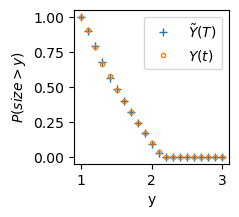

In [18]:
theta = 2,0.05,0.2,0.05 # τ,D,s,dt
init = [0,1.,1]

num_cells = 25
num_lins = 1



data= make_lineages(generator,init,theta,num_cells,num_lins);
df1 = DataFrame(data,["time","x","length","cell", "lineage"]);
df1 = df1[df1.cell .> 10,:];

theta = 0.1,0.05,0.2,0.05 # τ,D,s,dt
data= make_lineages(generator,init,theta,num_cells,num_lins);
df2 = DataFrame(data,["time","x","length","cell", "lineage"]);
df2 = df2[df2.cell .> 10,:];

fig,ax = subplots(figsize=(2,2))
lrange = collect(1:0.1:3)
ax.plot(lrange,[length(df1.length[df1.length .> l]) for l in lrange]/length(df1.length),"+",label=L"\tilde{Y}(T)")
ax.plot(lrange,[length(df2.length[df2.length .> l]) for l in lrange]/length(df2.length)
,".",fillstyle="none",label=L"Y(t)")
ax.set_xlabel("y")
ax.set_ylabel(L"P(size > y)")
ax.legend(frameon=true)

savefig(FIG_PATH*"/distributions.pdf",bbox_inches="tight")
fig
